# Visualizing the Data

Step 1: Loading Libraries

Step 2: Loading Data

Step 3: Defining Important Variables

Step 4: Some Additional Cleaning

Step 5: Exploring Relationships

    Step 5a: Correlation Heatmap

    Step 5b: Correlation Scatterpoints

    Step 5c: Pair Plot

    Step 5d: Categorical Plot

Step 6: Answering Project Questions

Step 7: Defining Hypothesis

Step 8: Saving Data

## Step1 : Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## Step 2: Loading Data

In [2]:
# Establishing the path
path = 'C:/users/gav/Documents/Career Foundry Data Analytics/Section 6 - Advanced Analytics & Dashboard Design'

In [3]:
df = pd.read_csv(os.path.join(path, 'Project Docs', '02 Data', 'Prepared Data', 'cleaned_data.csv'), index_col = False)

# Step 3: Defining Important Variables

For this project we are looking to answer the following questions:

• Which genre historically outperforms in sales?

• Which genre is currently growing in sales?

• Which region is purchasing the most games?

• Is the pattern of region purchases changing?

• Based on user and critic reviews, what genre is the highest rated? The lowest?

• What are the genre trends based on ratings?


To answer these questions we are going to need to focus on all of the columns except for 'Name', 'Platform', and 'Publisher'. Later on it is revealed that an 'Unnamed' column is present, so that is later deleted.

## Step 4: Some Additional Cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year_of_Release', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'User_Score', 'Genre_Code'],
      dtype='object')

In [5]:
df.head

<bound method NDFrame.head of        Unnamed: 0                           Name Platform  Year_of_Release  \
0               0                     Wii Sports      Wii           2006.0   
1               1              Super Mario Bros.      NES           1985.0   
2               2                 Mario Kart Wii      Wii           2008.0   
3               3              Wii Sports Resort      Wii           2009.0   
4               4       Pokemon Red/Pokemon Blue       GB           1996.0   
...           ...                            ...      ...              ...   
16712       16714  Samurai Warriors: Sanada Maru      PS3           2016.0   
16713       16715               LMA Manager 2007     X360           2006.0   
16714       16716        Haitaka no Psychedelica      PSV           2016.0   
16715       16717               Spirits & Spells      GBA           2003.0   
16716       16718            Winning Post 8 2016      PSV           2016.0   

              Genre     Publisher

In [6]:
# To drop the Unnamed column
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
# Checking the work
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'User_Score', 'Genre_Code'],
      dtype='object')

In [8]:
df.head

<bound method NDFrame.head of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16712  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16713               LMA Manager 2007     X360           2006.0        Sports   
16714        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16715               Spirits & Spells      GBA           2003.0      Platform   
16716            Winning Post 8 2016      PSV           2016.0    Simulation   

         

In [9]:
# Checking to see if there are any years we could drop from the list
df['Year_of_Release'].value_counts(dropna = False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

Since the latest years (2017 and 2020) only have a handful of titles, it would make sense to drop them along with the Nulls.

In [10]:
df.drop(df[df['Year_of_Release'] > 2016].index, inplace = True)

In [11]:
df['Year_of_Release'].value_counts(dropna = False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In the cleaning phase I had included code to alter the Name, Platform, Genre, and Publisher columns into strings, but the change did not seem to last, so I will do it once more.

In [12]:
# Altering data types
df['Name'] = df['Name'].astype(pd.StringDtype())

In [13]:
df['Platform'] = df['Platform'].astype(pd.StringDtype())

In [14]:
df['Genre'] = df['Genre'].astype(pd.StringDtype())

In [15]:
df['Publisher'] = df['Publisher'].astype(pd.StringDtype())

In [16]:
# Checking the work
df.dtypes

Name                string
Platform            string
Year_of_Release    float64
Genre               string
Publisher           string
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
User_Score         float64
Genre_Code         float64
dtype: object

In [17]:
# User Score is on a scale of 1 to 10, whereas Critic Score is on a scale of 1 to  100, let's fix that
df['User_Score'] = df['User_Score']*10

In [18]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Genre_Code
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,80.0,2.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,8.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,83.0,7.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,80.0,2.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,4.0


### Important Note: The game sales are in millions, so 40 in Global Sales = 40 million sales.

## Step 5: Exploring Relationships

In [19]:
# Before creating a correlation matrix I need to create a subset of the data that is focused on the numerical columns
df_num = df.drop(columns =['Name', 'Platform', 'Genre', 'Publisher'])

In [20]:
# Creating a correlation matrix
df_num.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Genre_Code
Year_of_Release,1.000000,-0.092326,0.004045,-0.168477,0.037821,-0.076245,0.011411,-0.267851,-0.130280
NA_Sales,-0.092326,1.000000,0.765341,0.449668,0.638695,0.941014,0.240755,0.086200,-0.013399
EU_Sales,0.004045,0.765341,1.000000,0.435079,0.722796,0.901237,0.220752,0.055337,-0.023147
JP_Sales,-0.168477,0.449668,0.435079,1.000000,0.291090,0.612341,0.152593,0.125598,0.033215
Other_Sales,0.037821,0.638695,0.722796,0.291090,1.000000,0.749258,0.198554,0.057119,-0.040632
Global_Sales,-0.076245,0.941014,0.901237,0.612341,0.749258,1.000000,0.245471,0.088139,-0.012845
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.580878,0.015798
User_Score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.088139,0.580878,1.000000,0.048904
Genre_Code,-0.130280,-0.013399,-0.023147,0.033215,-0.040632,-0.012845,0.015798,0.048904,1.000000


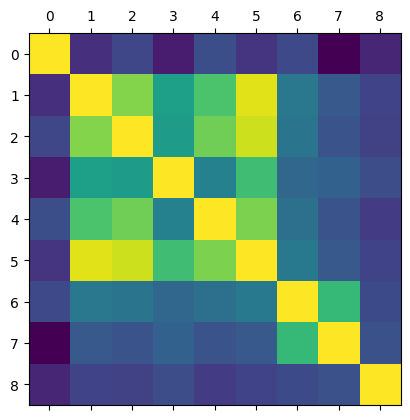

In [21]:
# Creating basic heat map
plt.matshow(df_num.corr())
plt.show()

### Step 5a: Correlation Heatmap

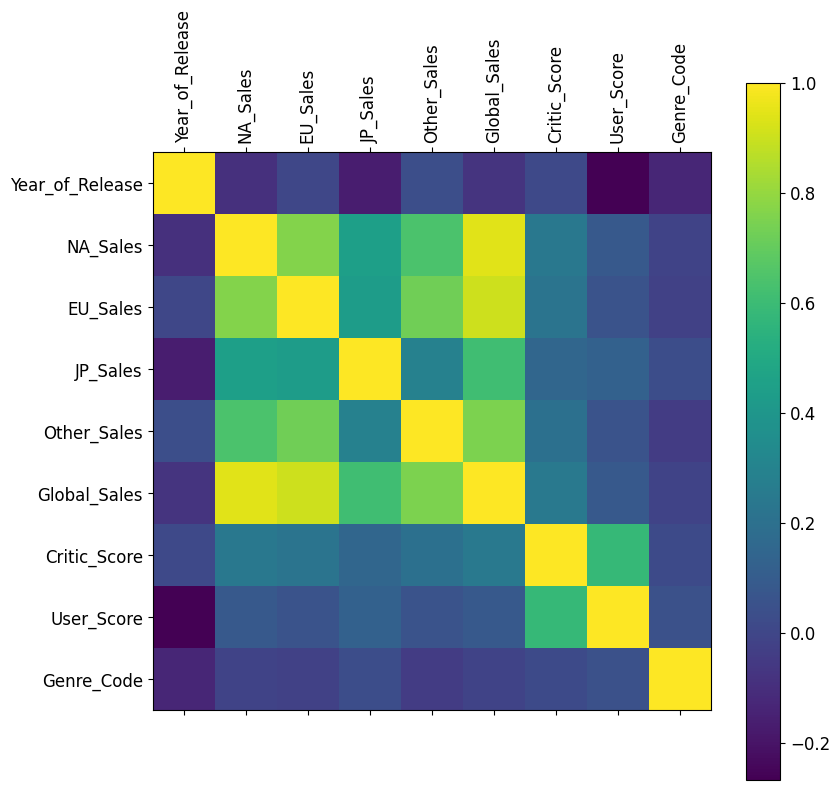

In [22]:
# Creating a heatmap of the correlation matrix with labels and legend

# altering the figure size
f = plt.figure(figsize=(9,9))
# type of plot
plt.matshow(df_num.corr(), fignum=f.number)
# defining the axis
plt.xticks(range(df_num.shape[1]), df_num.columns, fontsize=12, rotation=90)
plt.yticks(range(df_num.shape[1]), df_num.columns, fontsize=12)
# adding a color legend
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
# saving the figure
plt.savefig(os.path.join(path, 'Project Docs', '04 Analysis', 'Visualizations', 'corr_matrix-heatmap.png'))

Using the above vizualization we can draw some important points:

1. Global Sales are largely correlated to NA Sales, meaning that North American sales are the largest driver of global sales.

2. User Score and Critic Score are substantially correlated, meaning that both reviews should be similar for individual games.

3. There is little correlation between Genre Code and Review Scores, once we look closer at individual genres we should get a better idea of both review and sales performances for each genre.

4. User Score and Year of Release have a slight negative correlation, this could be an interesing trend to look into.

### Step 5b: Correlation Scatterpoints

For this section we will be looking at the relationship between some of the closely correlated variables found in the heatmap.

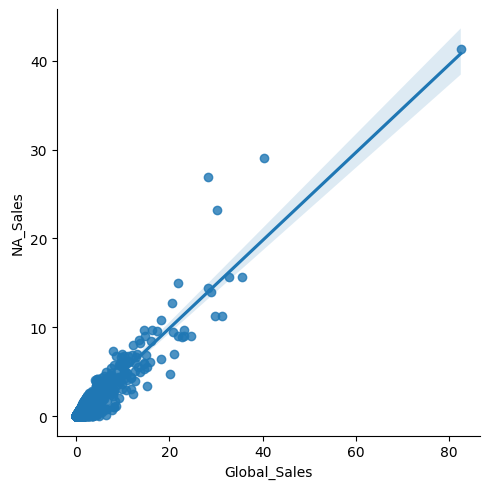

In [23]:
# NA Sales and Global Sales
sns.lmplot(x = 'Global_Sales', y = 'NA_Sales', data = df)

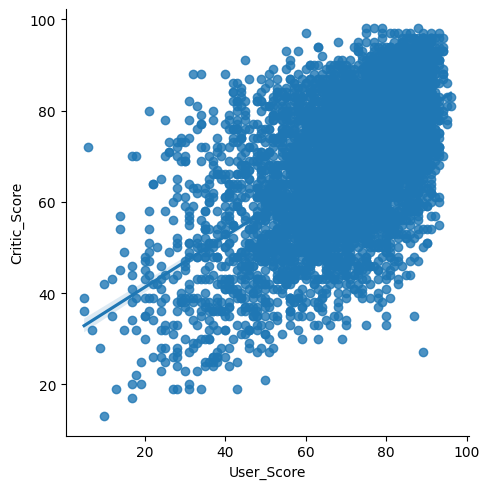

In [24]:
# User Score and Critic Score
sns.lmplot(x = 'User_Score', y = 'Critic_Score', data = df)

The above visualization is too crowded to be useful, so perhaps using a sample of the data for this would be helpful.

In [25]:
# Creating a sample
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.9

In [26]:
# Using the sample
sam = df[~dev]

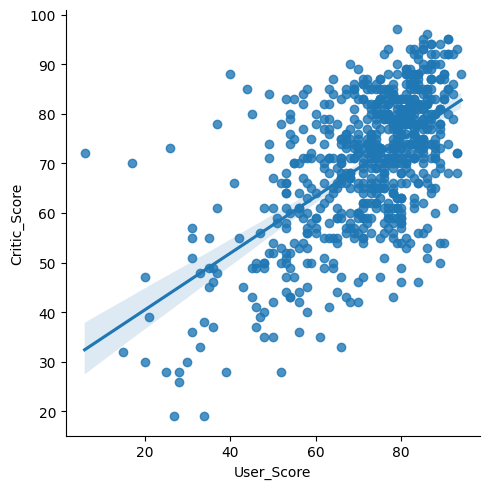

In [27]:
# User Score and Critic Score
sns.lmplot(x = 'User_Score', y = 'Critic_Score', data = sam)

Since this is more readable we'll be using the sample for the other scatter plots.

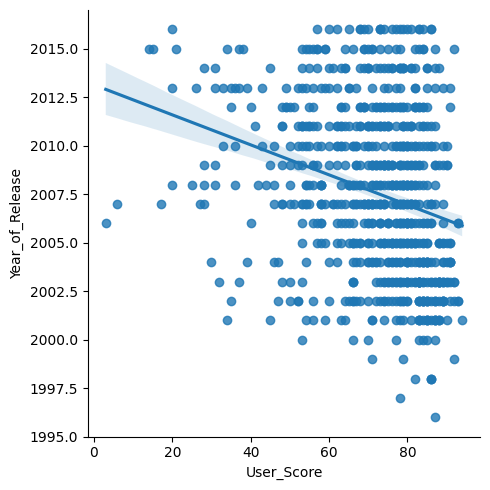

In [28]:
# User Score and Year of Release
sns.lmplot(x = 'User_Score', y = 'Year_of_Release', data = sam)

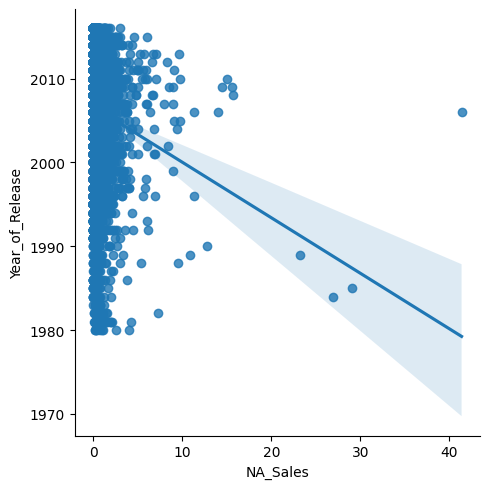

In [29]:
# The next group of graphs will look at how each region's sales are changing with time
# Note: Ordinarily time would be the X axis, but with the vast majority of sales being close to 0
# the trend line could not be seen
sns.lmplot(x = 'NA_Sales', y = 'Year_of_Release', data = df)

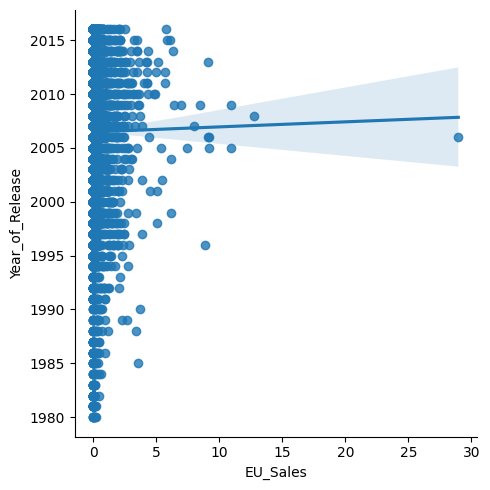

In [31]:
sns.lmplot(x = 'EU_Sales', y = 'Year_of_Release', data = df)

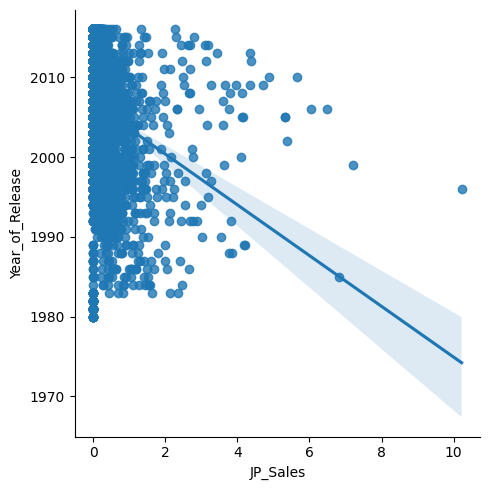

In [32]:
sns.lmplot(x = 'JP_Sales', y = 'Year_of_Release', data = df)

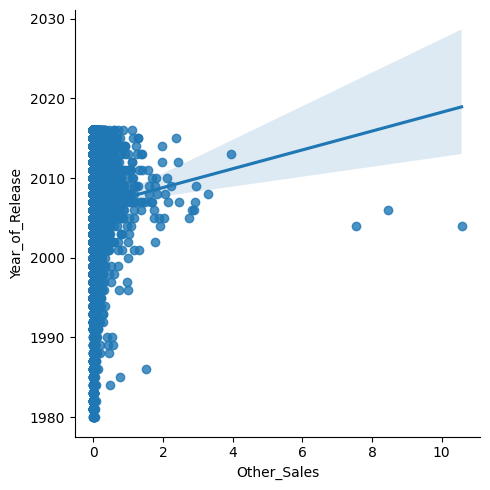

In [33]:
sns.lmplot(x = 'Other_Sales', y = 'Year_of_Release', data = df)

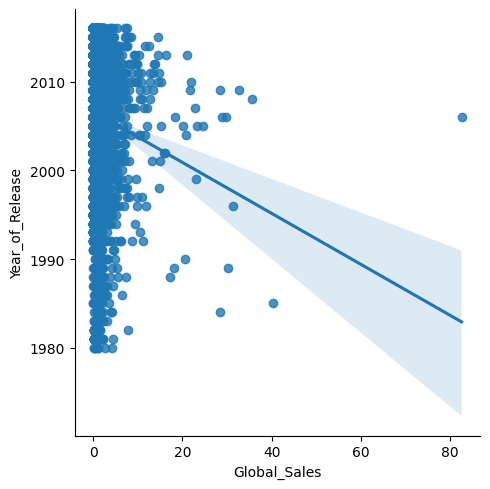

In [34]:
sns.lmplot(x = 'Global_Sales', y = 'Year_of_Release', data = df)

Using the above scatterplots we can draw the following conclusions:

1. Very few games reach above 5 million sales, with only 4 selling more than 20 million. However, these sales appear to be largely driven by the NA market.

2. As the graph shows, there are plenty of games that do not match the general trend of consumers and critics agreeing on the score of games.

3. Looking over the Year of Release and User Score chart we can see that there is no easily-discernable trend in the data, but based on the trend line it appears that the older games have a higher user score than more recent scores.

4. Comparing the Regional Sales over time for each region we are seeing NA, JP, and Global Sales are decreasing whereas EU and Other Regions are increasing in sales.

### Step 5c: Pair Plot

In [35]:
# Before creating the pair plots, let's make a sample of the numerical categories
np.random.seed(4)
dev_1 = np.random.rand(len(df_num)) <= 0.9

In [36]:
sam_1 = df_num[~dev_1]

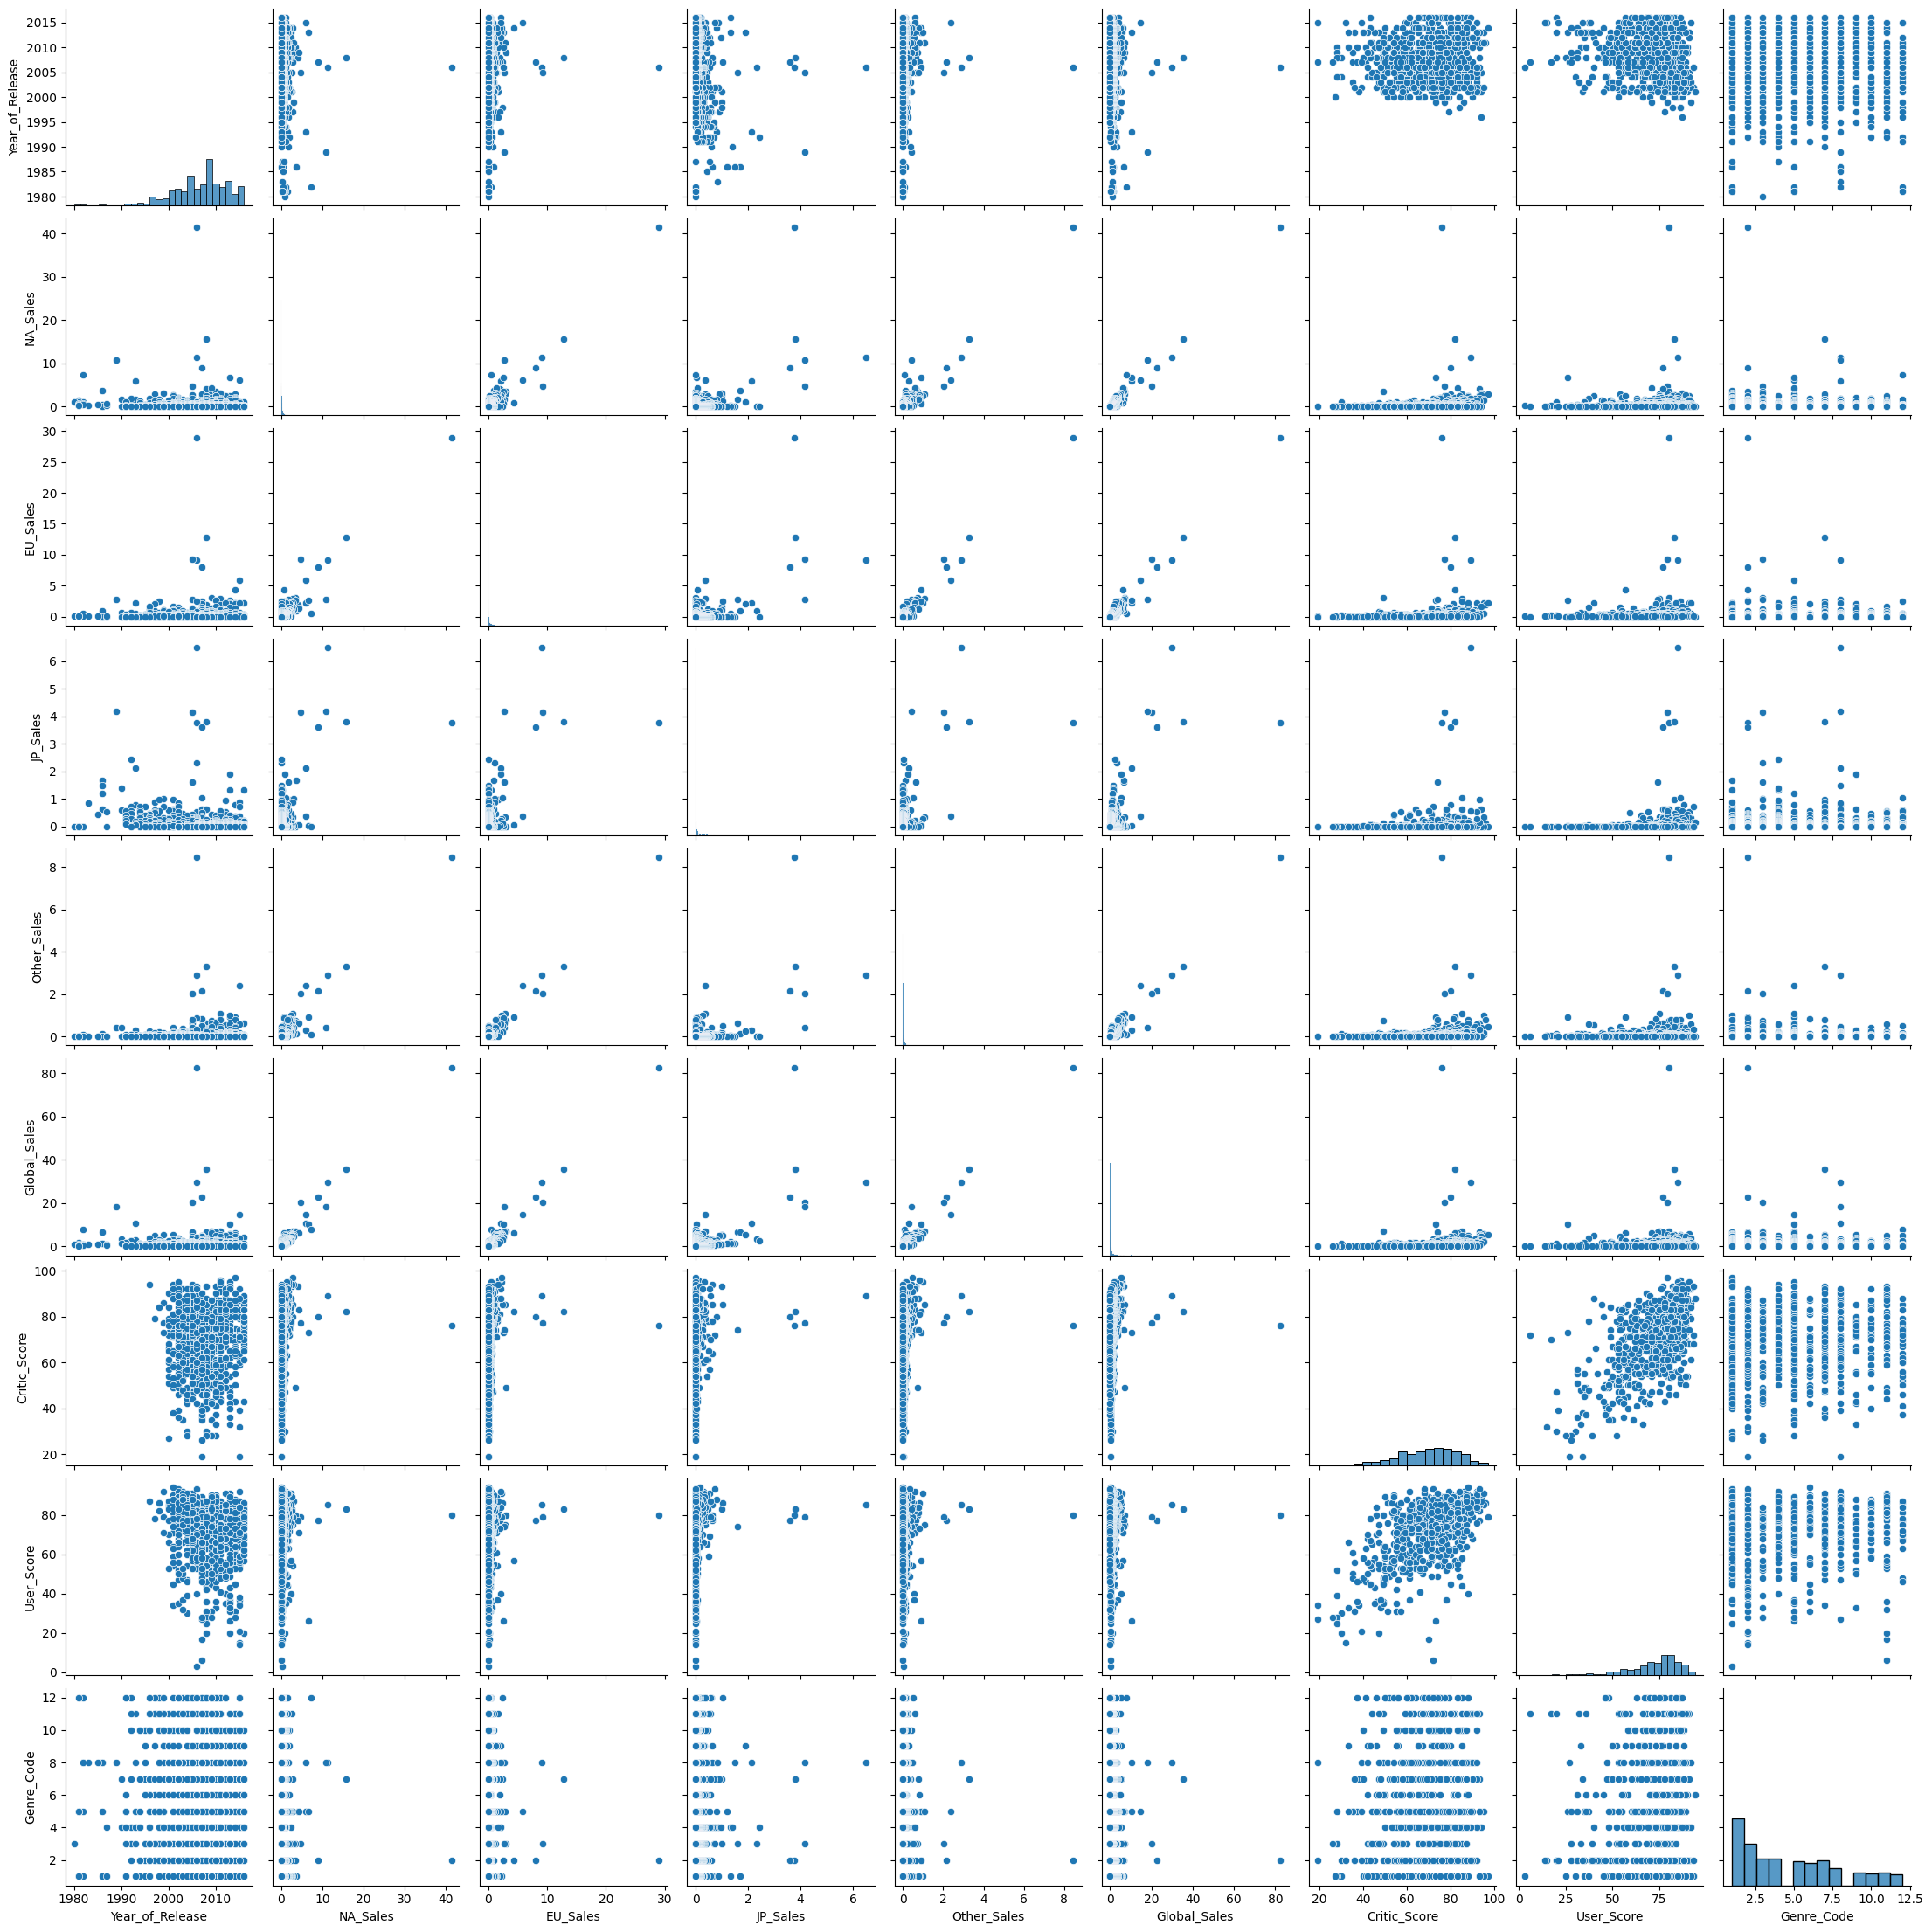

In [37]:
# Creating Pair Plots
pp = sns.pairplot(sam_1)

Using the Pair Plot above:

1. One of the important relationships to dig into is Critic and User Scores compared to the Genre Code, this will help determine what genres are the most popular. Comparing sales for each region with the Genre Code will see if critical acclaim translates to sales.
2. Something fascinating is that there are no critic or consumer scores for games before the late 90's. Most likely this is due to these reviews being tabulated and storeed online, so there would be nothing on the site before the proliferation of the internet.

### Step 5d: Categorical Plot

<AxesSubplot: xlabel='Critic_Score', ylabel='Count'>

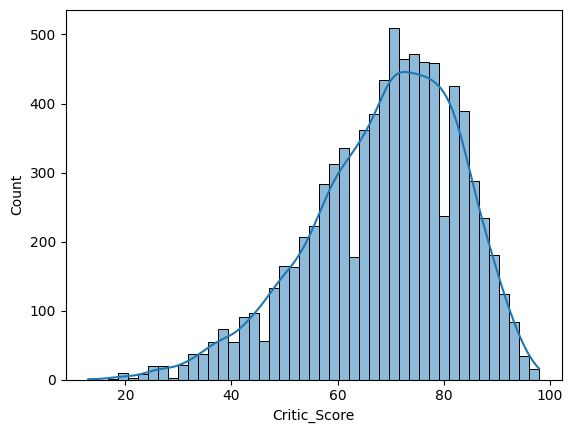

In [45]:
# To create the categorical plot to determine the relationship between review scores and sales,
# we must first categorize the reviews by using a histograph
sns.histplot(df['Critic_Score'], kde = True)

<AxesSubplot: xlabel='User_Score', ylabel='Count'>

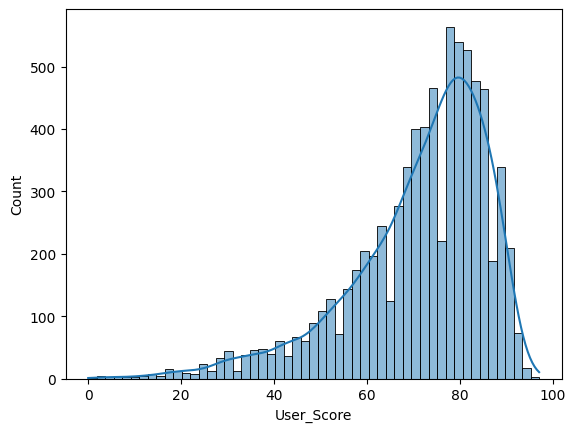

In [46]:
sns.histplot(df['User_Score'], kde = True)

In [47]:
# Now to create categories for critic reviews
df.loc[df['Critic_Score'] < 55, 'Critic_Review'] = 'Poor Review'

In [51]:
df.loc[(df['Critic_Score'] >= 55) & (df['Critic_Score'] < 80), 'Critic_Review'] = 'Good Review'

In [52]:
df.loc[df['Critic_Score'] > 80, 'Critic_Review'] = 'Excellent Review'

In [53]:
# Checking the counts
df['Critic_Review'].value_counts(dropna = False)

NaN                 8813
Good Review         4875
Excellent Review    1775
Poor Review         1250
Name: Critic_Review, dtype: int64

In [54]:
# Creating categories for user reviews
df.loc[df['User_Score'] < 60, 'User_Review'] = 'Poor Review'

In [55]:
df.loc[(df['User_Score'] >= 60) & (df['User_Score'] < 80), 'User_Review'] = 'Good Review'

In [56]:
df.loc[df['User_Score'] >= 80, 'User_Review'] = 'Excellent Review'

In [58]:
# Checking the counts
df['User_Review'].value_counts(dropna = False)

NaN                 9123
Good Review         3612
Excellent Review    2588
Poor Review         1390
Name: User_Review, dtype: int64

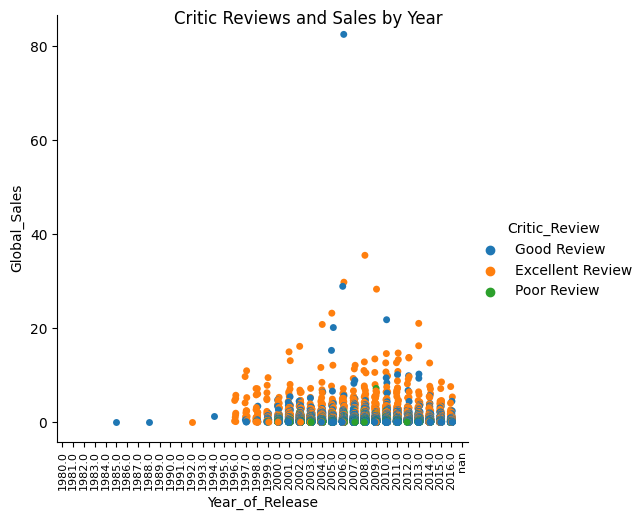

In [71]:
# Creating a categorical plot of sales to critic reviews
cr = sns.catplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'Critic_Review', data = df)
cr.fig.suptitle('Critic Reviews and Sales by Year')
cr.set_xticklabels(size = 8, rotation=90)

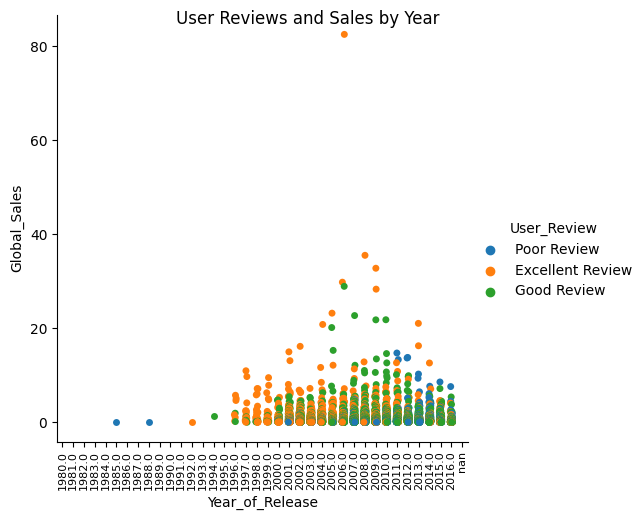

In [72]:
# Creating a categorical plot of sales to critic reviews
ur = sns.catplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'User_Review', data = df)
ur.fig.suptitle('User Reviews and Sales by Year')
ur.set_xticklabels(size = 8, rotation=90)

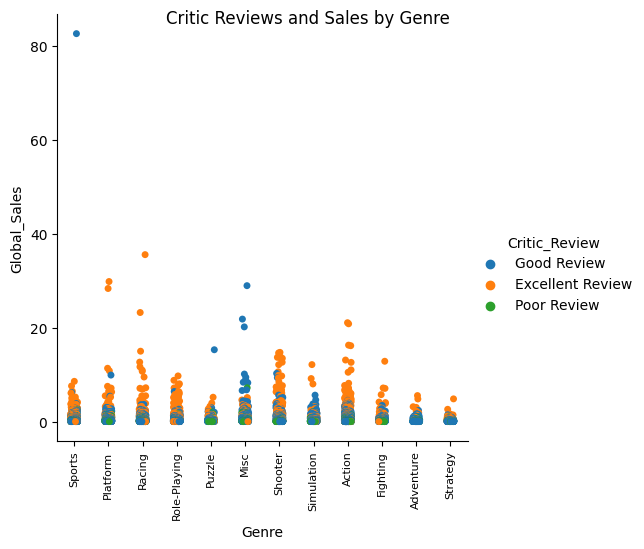

In [73]:
# Creating a categorical plot of genre sales to critic reviews
gcr = sns.catplot(x = 'Genre', y = 'Global_Sales', hue = 'Critic_Review', data = df)
gcr.fig.suptitle('Critic Reviews and Sales by Genre')
gcr.set_xticklabels(size = 8, rotation=90)

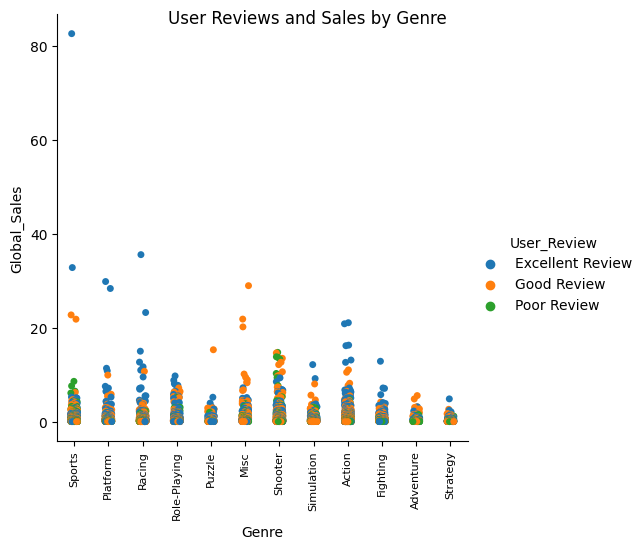

In [74]:
# Creating a categorical plot of genre sales to user reviews
gur = sns.catplot(x = 'Genre', y = 'Global_Sales', hue = 'User_Review', data = df)
gur.fig.suptitle('User Reviews and Sales by Genre')
gur.set_xticklabels(size = 8, rotation=90)

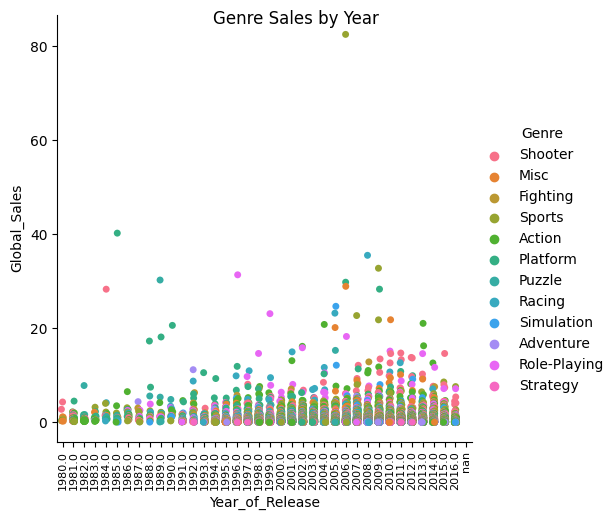

In [80]:
# To create the categorical plot to determine the relationship between genres and sales between years
gys = sns.catplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'Genre', data = df)
gys.fig.suptitle('Genre Sales by Year')
gys.set_xticklabels(size = 8, rotation=90)

Using the categorical plots above:

1. Focusing on the sales based on year charts we can see that there is an interesting correlation between sales and user reviews, where the largest selling games are more often games with Excellent user reviews, whereas some of the highest selling games only have a Good critic review. This reinforces the common-sense idea that user preference determines purchases more than expert opinions.
2. Using the genre charts above we can find a few insights, Sports games appear to be the highest-selling, at the same time some of the higher-selling sports games have poor user reviews. Racing, Platform, and Action games have the next highest sales and user reveiws, respecitvely.
3. The Genre Sales by Year chart is a bit crowded, but focusing on the highest selling games of each year se can see that Action and Platform games routinely have the highest sales, with Sports and Racing games close behind. By creating graphs for each genre individually we can try to get a better idea of each genre's performance.

Overall, what we can infer from these charts is that user scores matter more for sales than critic scores, and that Sports, Racing, Platform, and Action games receive the highest user scores and sales.

## Step 6: Answering Project Questions

With the charts we've created, let's try to answer some of our project questions:

• Which genre historically outperforms in sales?
As we saw, Racing, Platform, Action, and Action games have historically performed well.

• Which genre is currently growing in sales?
Most recently, Role Playing and Sports games are the highest selling.

• Which region is purchasing the most games?
The EU and Other Regions are currently seeing an increase in sales, whereas the other regions are decreasing.

• Is the pattern of region purchases changing?
Global, NA, and JP Sales are trending downward while the EU and Other Regions are growing, albeit slowly.

• Based on user and critic reviews, what genre is the highest rated? The lowest?
Sports, Platform, Racing, and Action games are the highest rated by users which we have shown is the real market predictor for sales. Puzzle, Strategy, and Adventure games have the lowest ratings and sales.

After this exercise I have found a new question to explore:

1. Have any genres been growing in terms of sales and ratings over time?


## Step 7: Defining Hypothesis

User reviews of games correlates with sales, as customer preference for genres increase so too will sales.

## Step 8: Saving Data

In [84]:
df.to_csv(os.path.join(path, 'Project Docs', '02 Data', 'Prepared Data', 'cleaned_data.csv'))